In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import seaborn as sns
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
})

# DATA ERDOS-RENYI UNIFORM DISTRIBUTION

In [5]:
data_1 = []
with (open("../python/Data/ER_points_20221122-09.p", "rb")) as openfile:
    while True:
        try:
            data_1.append(pickle.load(openfile))
        except EOFError:
            break
print(data_1)

[{'n_nodes': 1000, 'rate_shortest': 0.3569223919198807, 'fid_shortest': 0.8424706813146144, 'rate_bound': 0, 'fid_bound': 0, 'n_links': 7, 'n_links_bound': 22, 'valid_shortest': True, 'valid_bound': False, 'graph': 'ER/0', 'dist_type': 'uniform'}, {'n_nodes': 1000, 'rate_shortest': 0.24695496162450822, 'fid_shortest': 0.8541387945241198, 'rate_bound': 0, 'fid_bound': 0, 'n_links': 8, 'n_links_bound': 27, 'valid_shortest': True, 'valid_bound': False, 'graph': 'ER/0', 'dist_type': 'uniform'}, {'n_nodes': 1000, 'rate_shortest': 0.32504940484761496, 'fid_shortest': 0.8869676580255028, 'rate_bound': 0, 'fid_bound': 0, 'n_links': 7, 'n_links_bound': 22, 'valid_shortest': True, 'valid_bound': False, 'graph': 'ER/0', 'dist_type': 'uniform'}, {'n_nodes': 1000, 'rate_shortest': 1.0, 'fid_shortest': 0.958314440573312, 'rate_bound': 0, 'fid_bound': 0, 'n_links': 5, 'n_links_bound': 38, 'valid_shortest': True, 'valid_bound': False, 'graph': 'ER/0', 'dist_type': 'uniform'}, {'n_nodes': 1000, 'rate_s

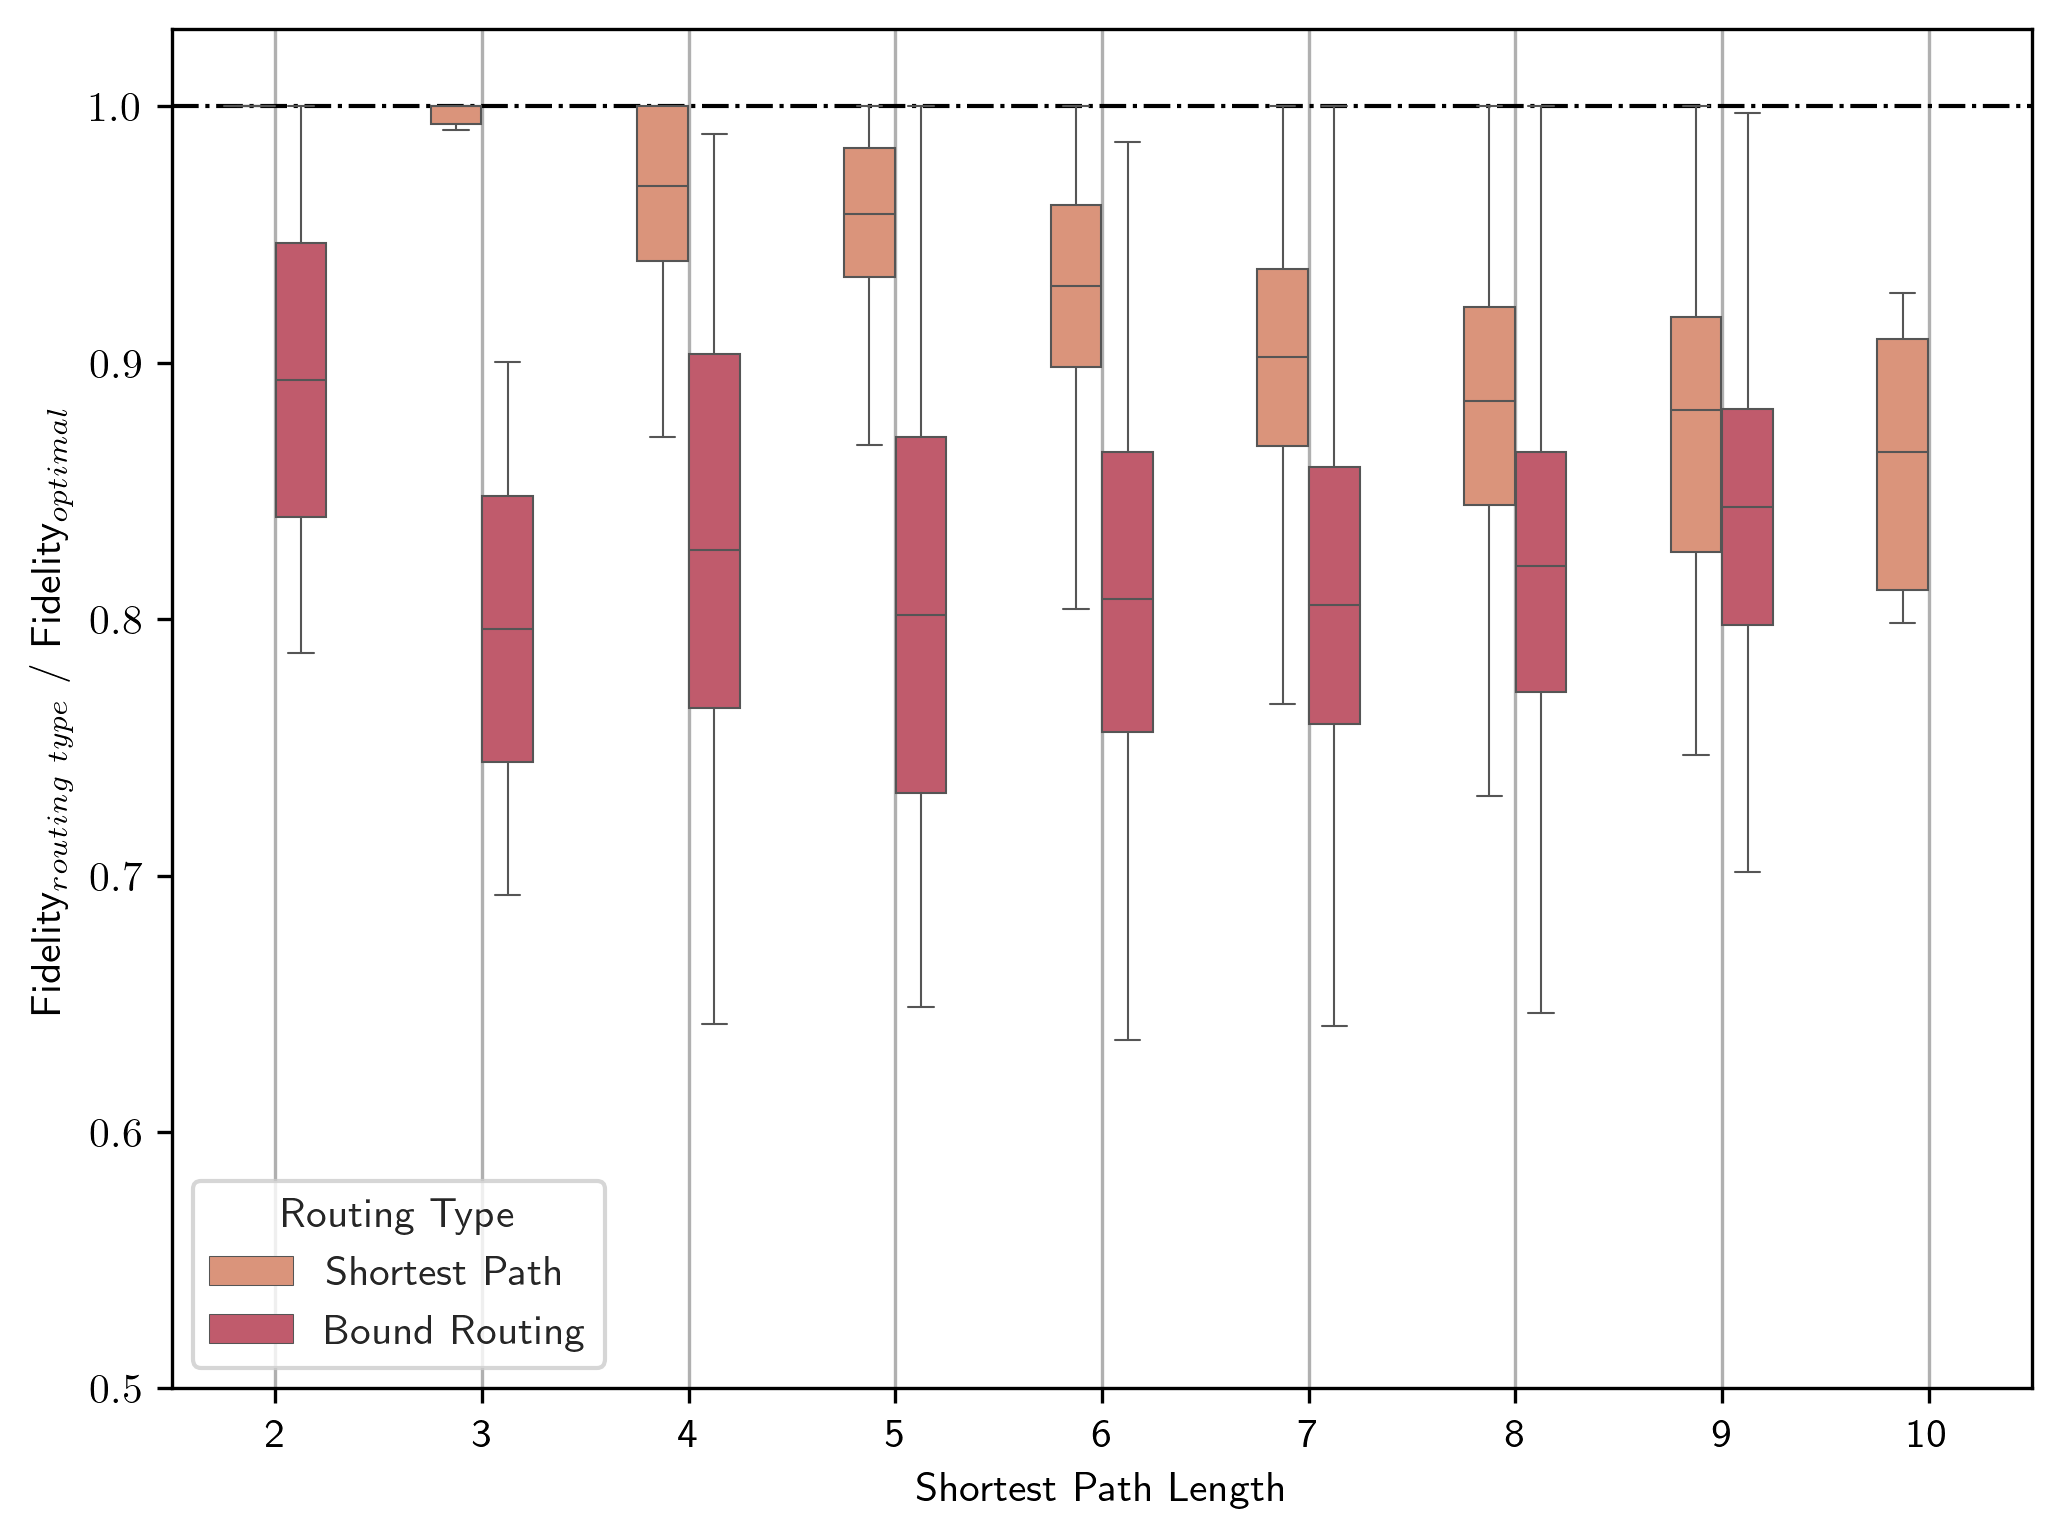

In [6]:
# Load package
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':300})

# Creating dataset
df = pd.DataFrame.from_dict(data_1)
df1 = df[~(df['n_links'] > 1000)]
df2 = df1[df1["valid_bound"]]

df1.insert(0, "Routing Type", ["Shortest Path"]*len(df1), True)
df1 = df1.rename(columns={'fid_shortest': 'fid', 'rate_shortest': 'rate'})
df1 = df1.drop(columns=['fid_bound', 'rate_bound'])
df1s = df1.copy()
df1s["n_links"] = df1s["n_links"]-1
df1s = df1s[~(df1s['n_links'] > 8)]

df2.insert(0, "Routing Type", ["Bound Routing"]*len(df2), True)
df2 = df2.rename(columns={'fid_bound': 'fid', 'rate_bound': 'rate'})
df2 = df2.drop(columns=['fid_shortest', 'rate_shortest'])
df2s = df2.copy()
df2s["n_links"] = df2s["n_links"]-2
#df2s = df2s[~(df2s['n_links'] > 7)]



df12 = pd.concat([df1, df2])
#print(df1)
#print(df2)
#print(df12)
df12s = pd.concat([df1s, df2s])

#print(df12s)

colors = [sns.color_palette("flare")[0]] + [sns.color_palette("flare")[2]]
fig, ax = plt.subplots(figsize=(8, 6))
sns.set_style('whitegrid')
#ax = sns.lineplot(x='n_links', y='fid',hue="Routing Type",data=df12s,legend=False,palette=colors)
#ax = sns.jointplot(x='n_links', y='fid',hue="Routing Type",data=df12s,kind="hist",legend=False,palette=colors)
#ax = sns.stripplot(x='n_links', y='fid',hue="Routing Type",data=df12,dodge=True, alpha=.05,linewidth=0.5,marker ="D", size=3, legend=False,palette=colors)
ax = sns.boxplot(x='n_links',y='fid',hue="Routing Type",data=df12,linewidth=0.5,showfliers=False,width=0.5,boxprops={"zorder": 2},palette=colors)
ax.hlines(y=1.00, xmin=-0.5, xmax=8.5, linewidth=1, linestyle='-.',color="black",alpha=1.0)


ax.set_ylim(0.5, 1.03)
ax.set_xlim(-0.5, 8.5)
plt.xlabel("Shortest Path Length")
ax.xaxis.grid(True)
ax.set(ylabel='Fidelity$_{routing \ type}$ / Fidelity$_{optimal}$')
#sns.despine(trim=True, left=True)
plt.savefig("Plots/ER_fid.pdf")
plt.show()

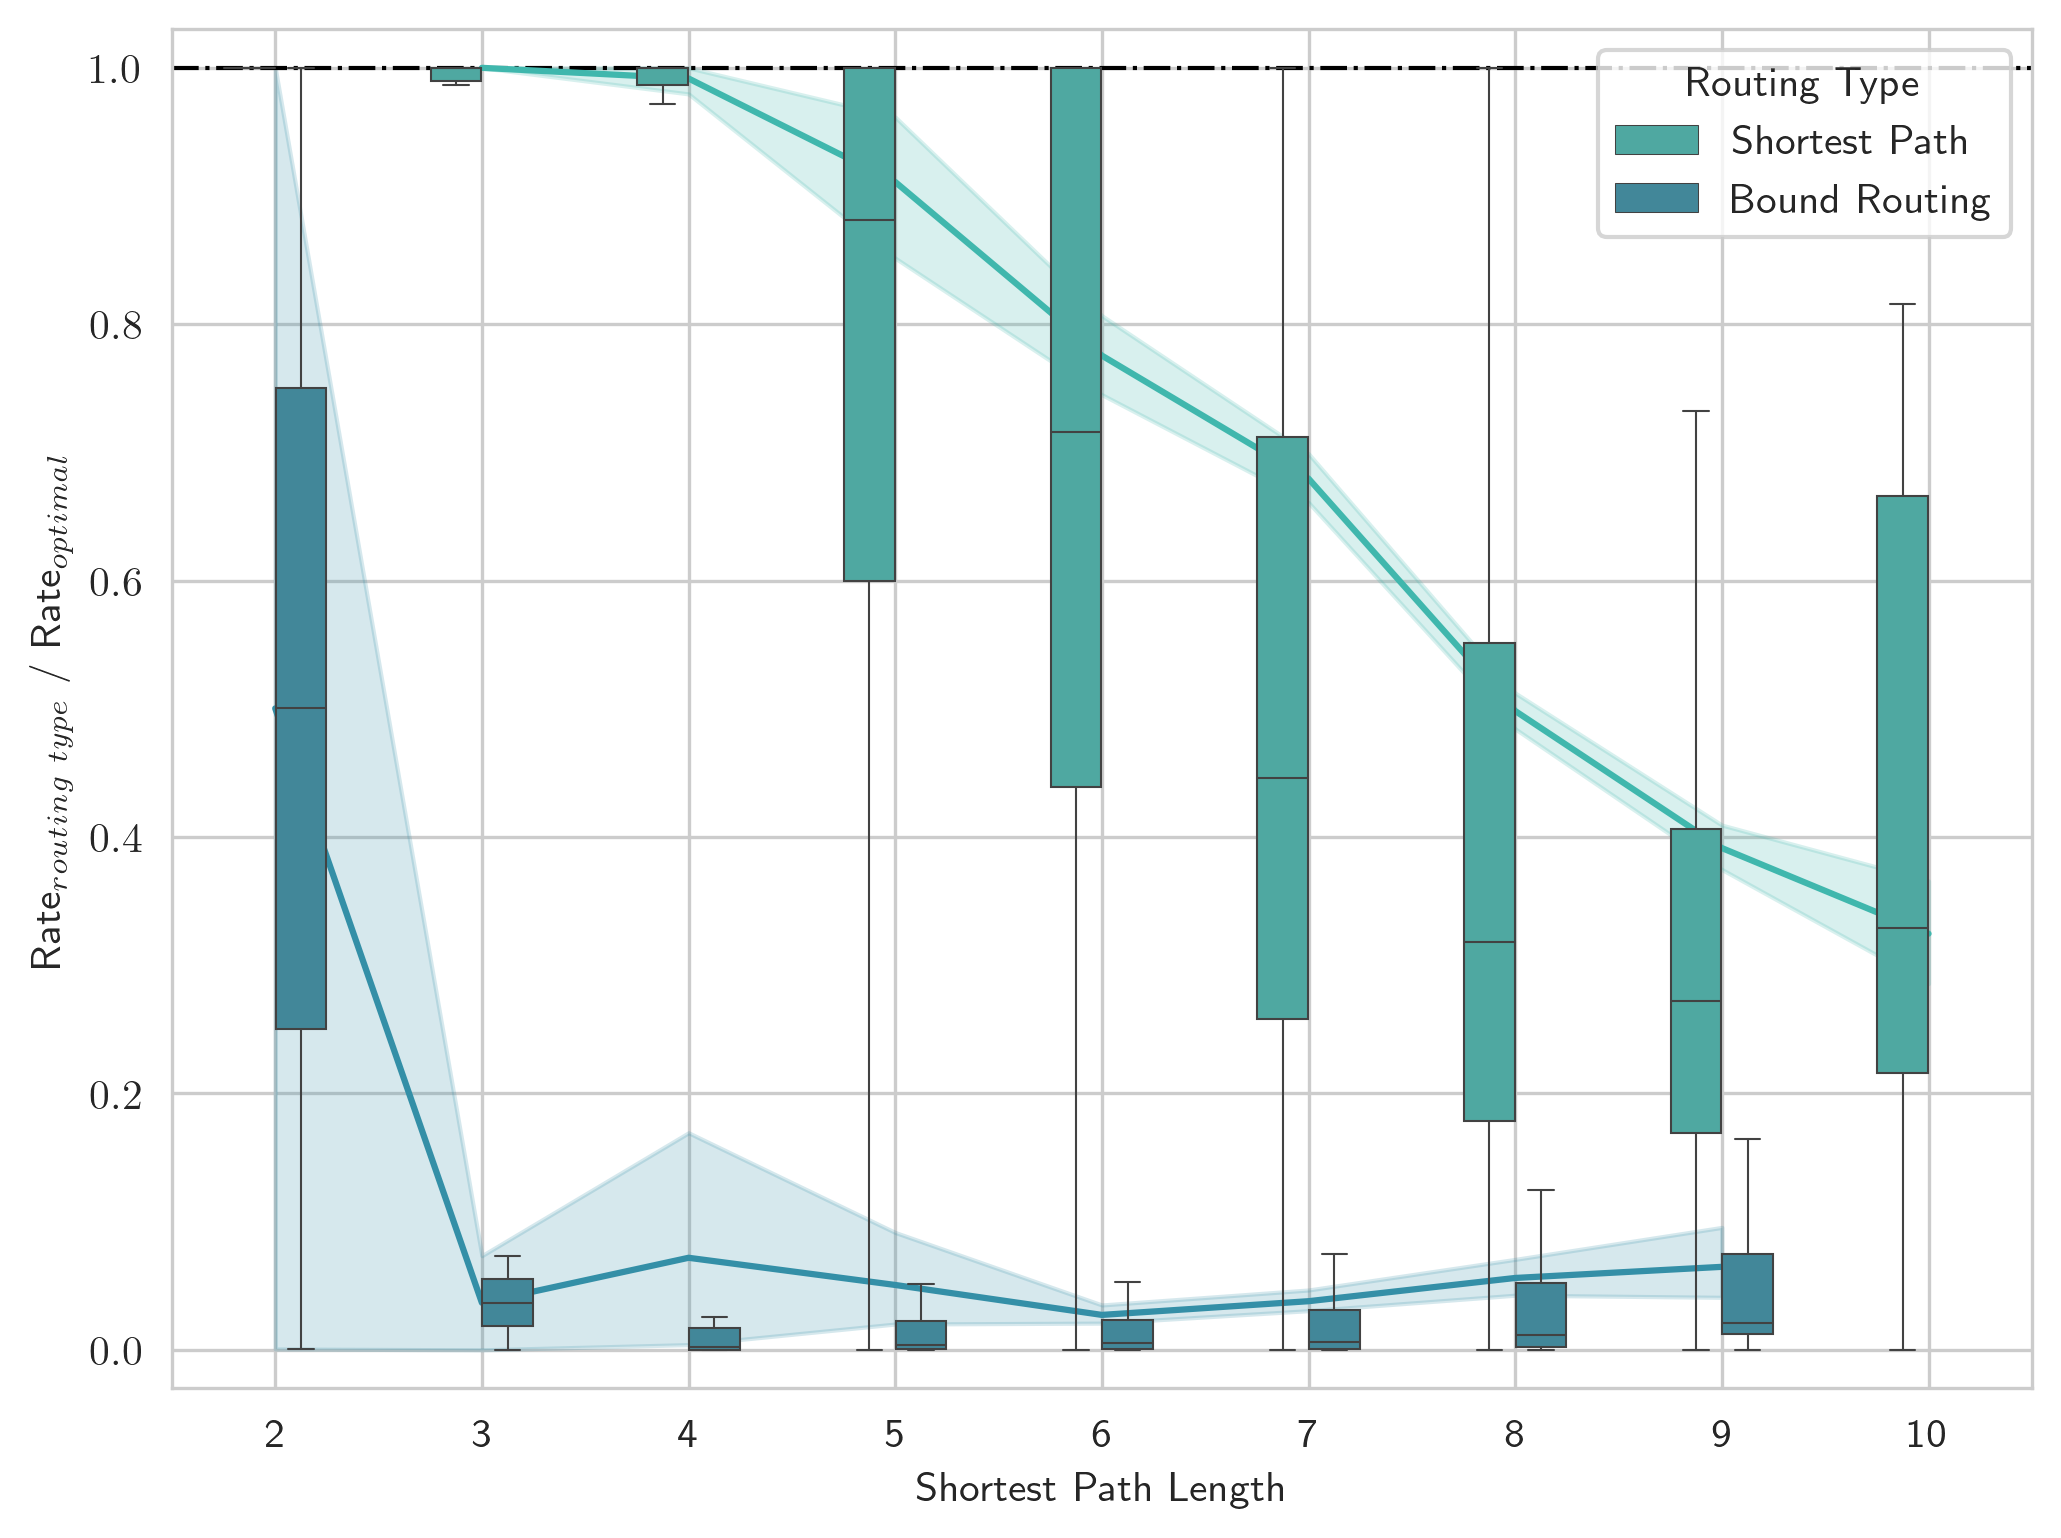

In [7]:
colors = [sns.color_palette("mako")[4]] + [sns.color_palette("mako")[3]]
fig, ax = plt.subplots(figsize=(8, 6))
sns.set_style('whitegrid')
ax = sns.lineplot(x='n_links', y='rate',hue="Routing Type",data=df12s,legend=False,palette=colors)
#ax = sns.stripplot(x='n_links', y='rate',hue="Routing Type",data=df12,dodge=True, alpha=.05,linewidth=0.5,marker ="D", size=3, legend=False,palette=colors)
ax = sns.boxplot(x='n_links',y='rate',hue="Routing Type",data=df12,linewidth=0.5,showfliers=False,width=0.5,boxprops={"zorder": 2},palette=colors)
ax.hlines(y=1.00, xmin=-0.5, xmax=8.5, linewidth=1, linestyle='-.',color="black",alpha=1.0)


ax.set_ylim(-0.03, 1.03)
ax.set_xlim(-0.5, 8.5)
plt.xlabel("Shortest Path Length")
ax.xaxis.grid(True)
ax.set(ylabel='Rate$_{routing \ type}$ / Rate$_{optimal}$')
#sns.despine(trim=True, left=True)
plt.savefig("Plots/ER_rate.pdf")
plt.show()

# DATA INTERNET UNIFORM DISTRIBUTION

In [8]:
data_2 = []
with (open("../python/Data/Internet_points_20221122-09.p", "rb")) as openfile:
    while True:
        try:
            data_2.append(pickle.load(openfile))
        except EOFError:
            break
print(data_2)

[{'n_nodes': 1000, 'rate_shortest': 1.0, 'fid_shortest': 0.9271160016925513, 'rate_bound': 0.4888091463191109, 'fid_bound': 0.8869602061665951, 'n_links': 6, 'n_links_bound': 7, 'valid_shortest': True, 'valid_bound': True, 'graph': 'Internet/0', 'dist_type': 'uniform'}, {'n_nodes': 1000, 'rate_shortest': 0.8988896508385815, 'fid_shortest': 0.877654282628038, 'rate_bound': 1.0, 'fid_bound': 0.8750852832038319, 'n_links': 6, 'n_links_bound': 7, 'valid_shortest': True, 'valid_bound': True, 'graph': 'Internet/0', 'dist_type': 'uniform'}, {'n_nodes': 1000, 'rate_shortest': 0.601360488982315, 'fid_shortest': 0.9193130786697746, 'rate_bound': 0.05351648113903039, 'fid_bound': 0.8351600545217438, 'n_links': 5, 'n_links_bound': 10, 'valid_shortest': True, 'valid_bound': True, 'graph': 'Internet/0', 'dist_type': 'uniform'}, {'n_nodes': 1000, 'rate_shortest': 0.8882963272781542, 'fid_shortest': 0.9580259725403419, 'rate_bound': 0.15650173549515775, 'fid_bound': 0.9338250772365825, 'n_links': 7, '

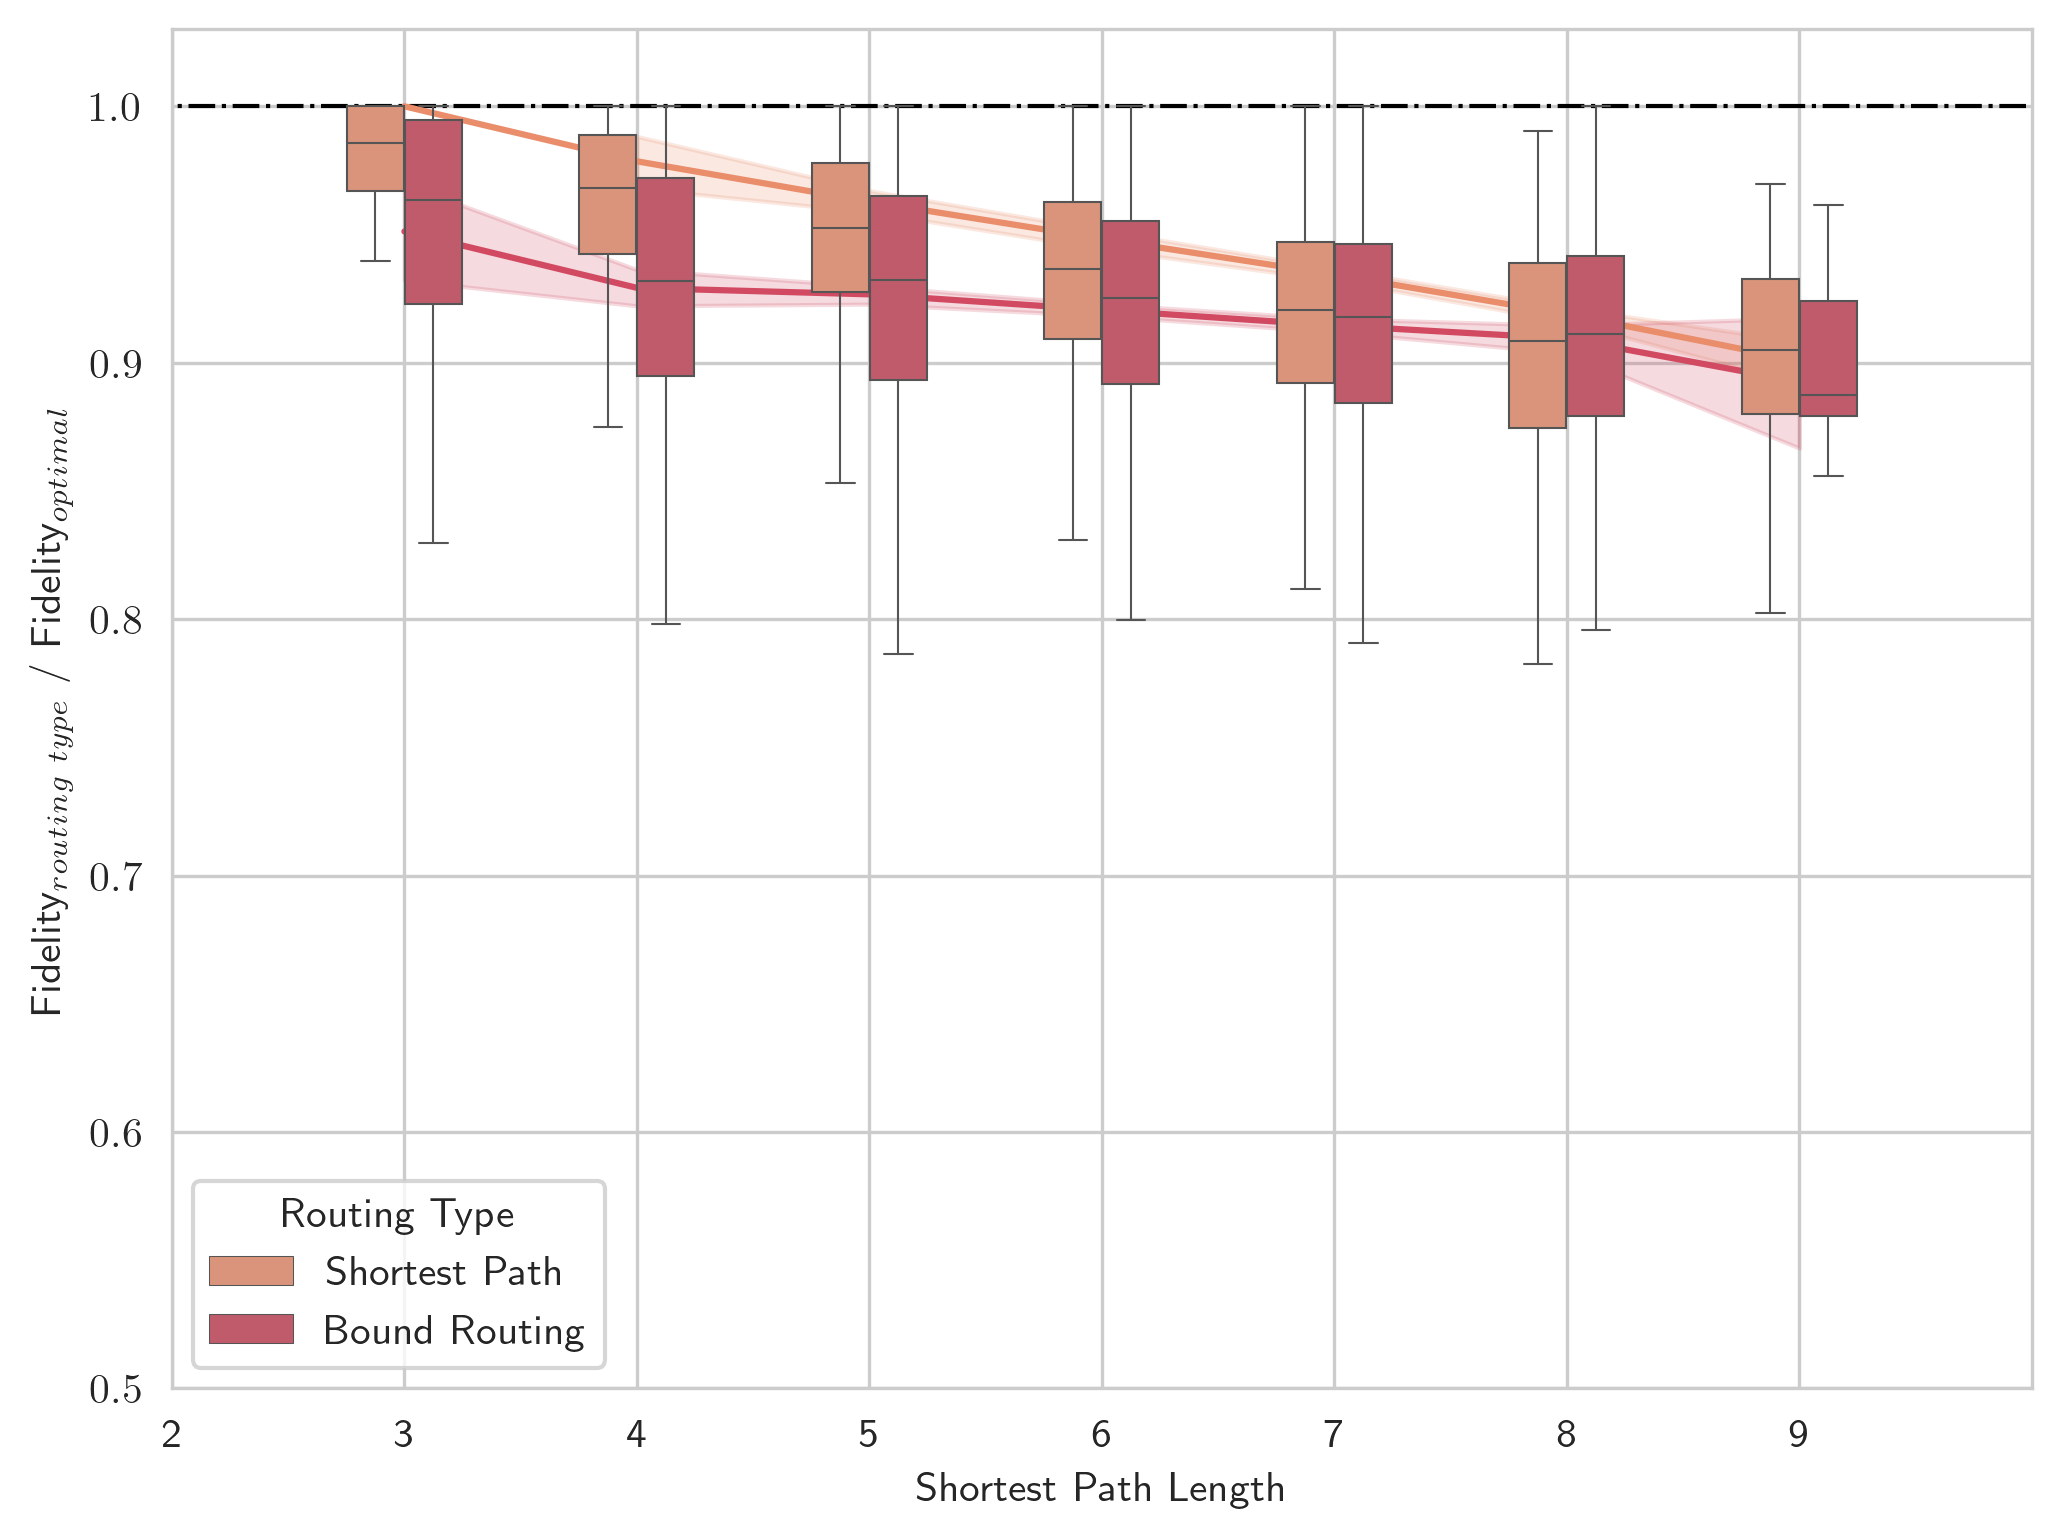

In [9]:
# Load package
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':300})

# Creating dataset
df = pd.DataFrame.from_dict(data_2)
df1 = df[~(df['n_links'] > 1000)]
df2 = df1[df1["valid_bound"]]

df1.insert(0, "Routing Type", ["Shortest Path"]*len(df1), True)
df1 = df1.rename(columns={'fid_shortest': 'fid', 'rate_shortest': 'rate'})
df1 = df1.drop(columns=['fid_bound', 'rate_bound'])
df1s = df1.copy()
df1s["n_links"] = df1s["n_links"]-1
df1s = df1s[~(df1s['n_links'] > 7)]

df2.insert(0, "Routing Type", ["Bound Routing"]*len(df2), True)
df2 = df2.rename(columns={'fid_bound': 'fid', 'rate_bound': 'rate'})
df2 = df2.drop(columns=['fid_shortest', 'rate_shortest'])
df2s = df2.copy()
df2s["n_links"] = df2s["n_links"]-2
df2s = df2s[~(df2s['n_links'] > 9)]



df12 = pd.concat([df1, df2])
#print(df1)
#print(df2)
#print(df12)
df12s = pd.concat([df1s, df2s])

#print(df12s)

colors = [sns.color_palette("flare")[0]] + [sns.color_palette("flare")[2]]
fig, ax = plt.subplots(figsize=(8, 6))
sns.set_style('whitegrid')
ax = sns.lineplot(x='n_links', y='fid',hue="Routing Type",data=df12s,legend=False,palette=colors)
#ax = sns.stripplot(x='n_links', y='fid',hue="Routing Type",data=df12,dodge=True, alpha=.05,linewidth=0.5,marker ="D", size=3, legend=False,palette=colors)
ax = sns.boxplot(x='n_links',y='fid',hue="Routing Type",data=df12,linewidth=0.5,showfliers=False,width=0.5,boxprops={"zorder": 2},palette=colors)
ax.hlines(y=1.00, xmin=-0.5, xmax=8.5, linewidth=1, linestyle='-.',color="black",alpha=1.0)


ax.set_ylim(0.5, 1.03)
ax.set_xlim(0., 8.)
plt.xlabel("Shortest Path Length")
ax.xaxis.grid(True)
ax.set(ylabel='Fidelity$_{routing \ type}$ / Fidelity$_{optimal}$')
#sns.despine(trim=True, left=True)
plt.savefig("Plots/Internet_fid.pdf")
plt.show()

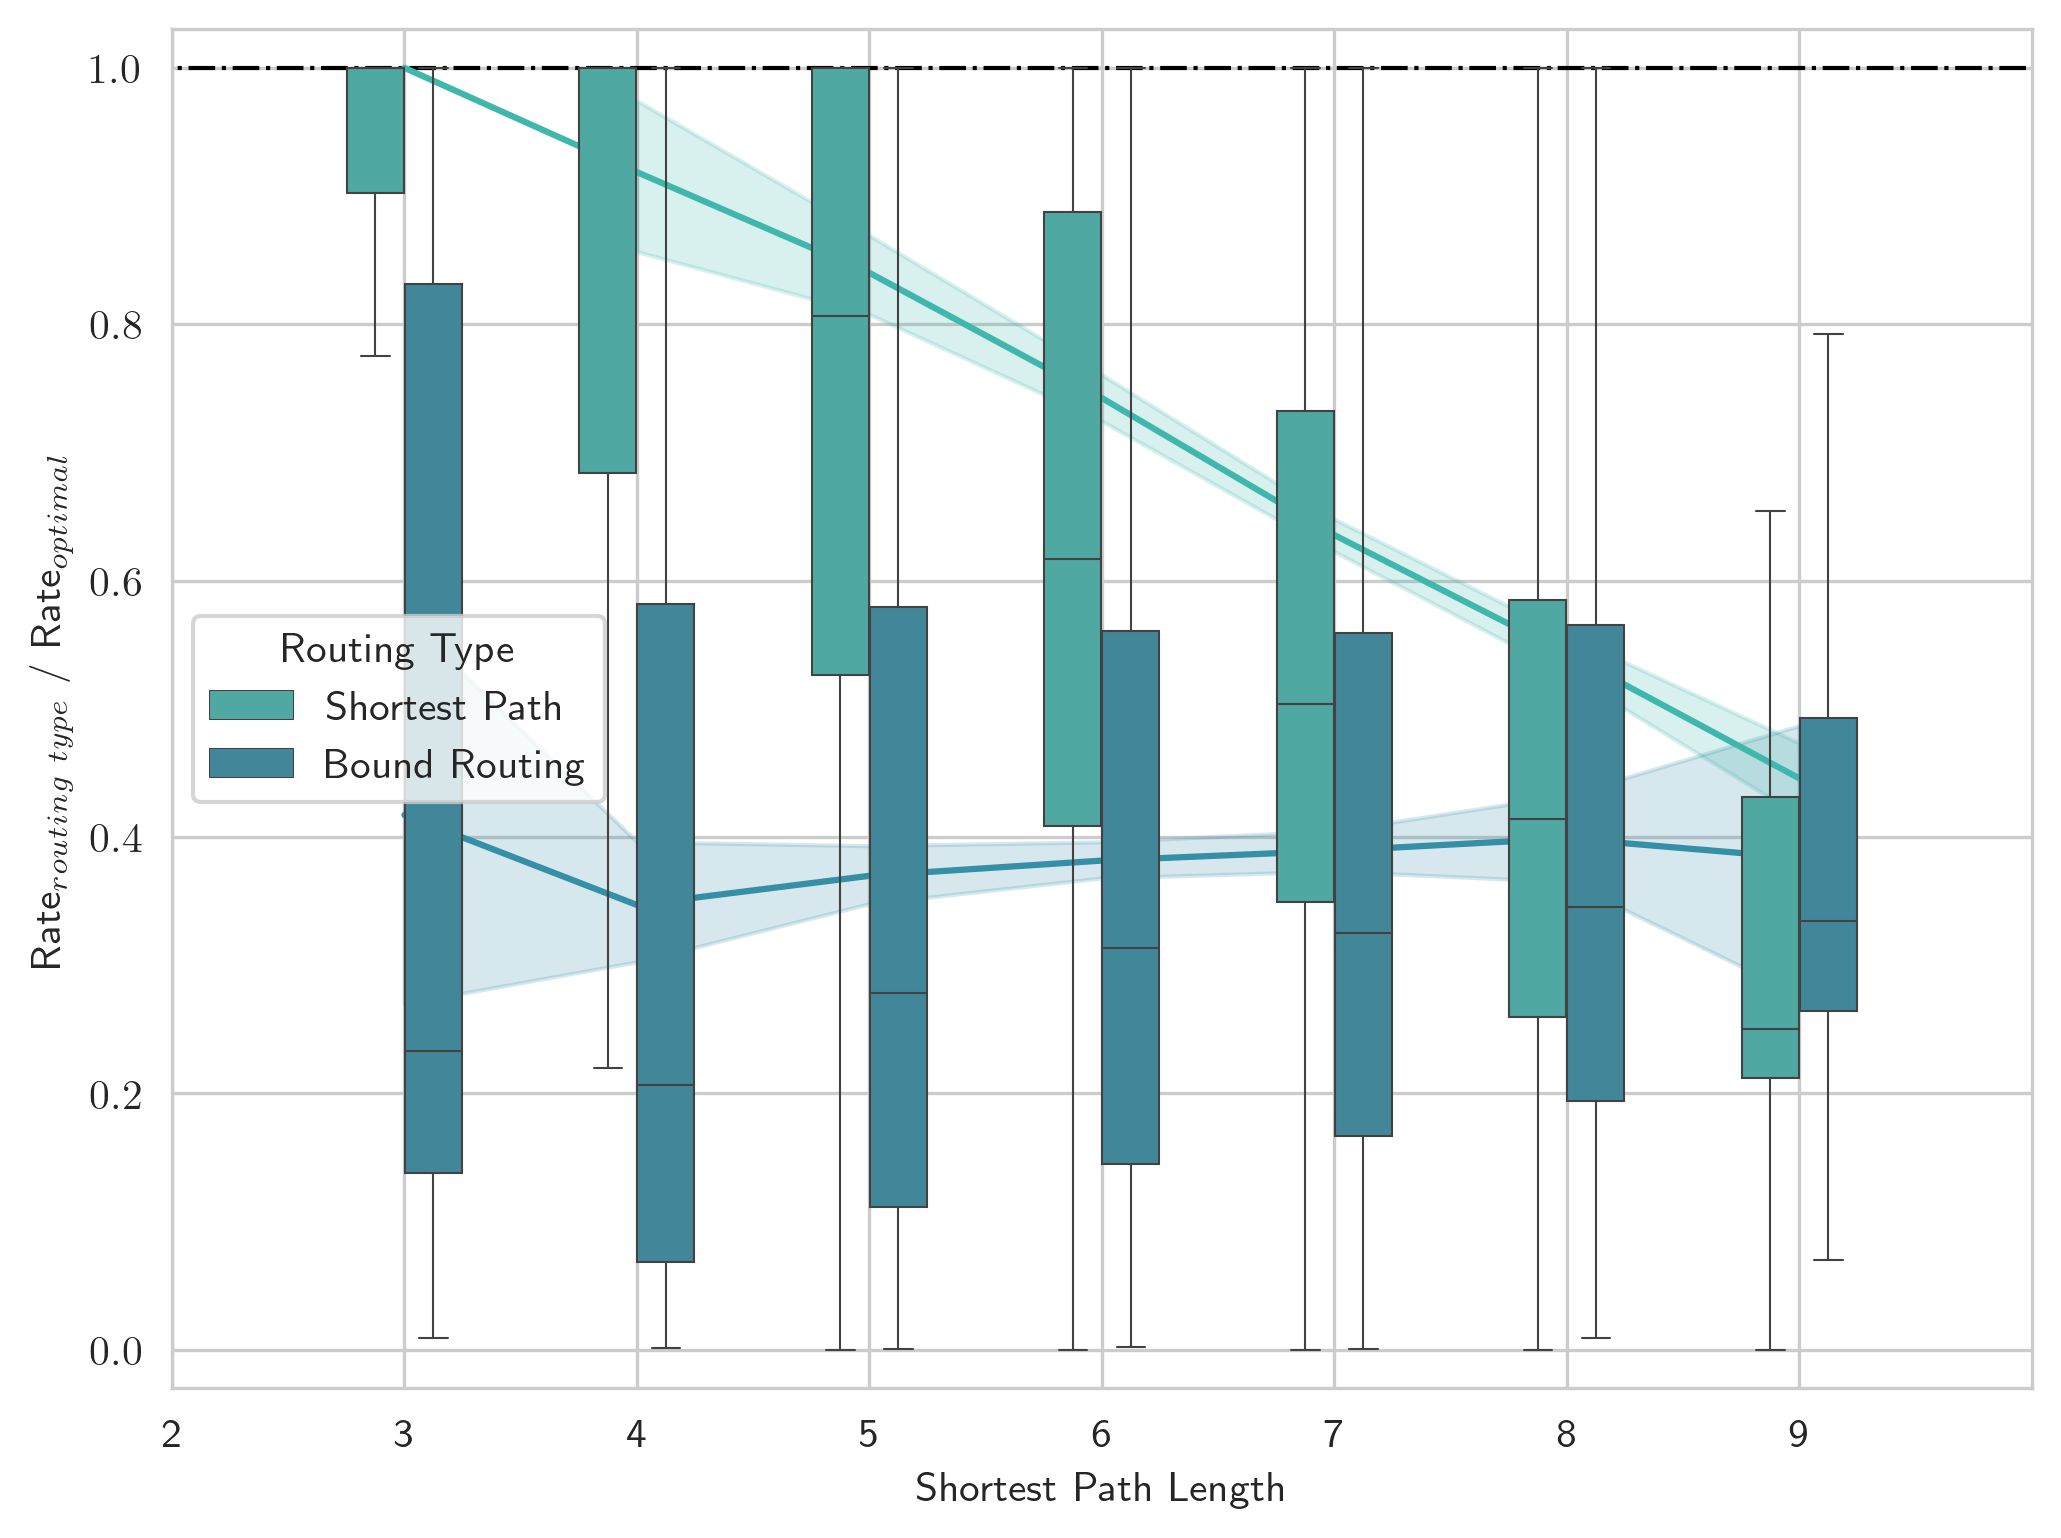

In [10]:
colors = [sns.color_palette("mako")[4]] + [sns.color_palette("mako")[3]]
fig, ax = plt.subplots(figsize=(8, 6))
sns.set_style('whitegrid')
ax = sns.lineplot(x='n_links', y='rate',hue="Routing Type",data=df12s,legend=False,palette=colors)
#ax = sns.stripplot(x='n_links', y='rate',hue="Routing Type",data=df12,dodge=True, alpha=.05,linewidth=0.5,marker ="D", size=3, legend=False,palette=colors)
ax = sns.boxplot(x='n_links',y='rate',hue="Routing Type",data=df12,linewidth=0.5,showfliers=False,width=0.5,boxprops={"zorder": 2},palette=colors)
ax.hlines(y=1.00, xmin=-0.5, xmax=8.5, linewidth=1, linestyle='-.',color="black",alpha=1.0)


ax.set_ylim(-0.03, 1.03)
ax.set_xlim(0., 8.)
plt.xlabel("Shortest Path Length")
ax.xaxis.grid(True)
ax.set(ylabel='Rate$_{routing \ type}$ / Rate$_{optimal}$')
#sns.despine(trim=True, left=True)
plt.savefig("Plots/Internet_rate.pdf")
plt.show()

# DATA CONVERGENCE

In [15]:
data_conv = []
#with (open("../results6/python/Convergence_points_20221206-17.p", "rb")) as openfile:
with (open("../python/Data/Convergence_points_20221206-17.p", "rb")) as openfile:
    while True:
        try:
            data_conv.append(pickle.load(openfile))
        except EOFError:
            break
print(len(data_conv))
#print(data_conv[:1000])

4100


       Routing Type  n_nodes      rate  fid  n_links  n_links_bound  \
0     Shortest Path     1000  0.243185  1.0        6              7   
1     Shortest Path     1000  0.286620  1.0        5              9   
2     Shortest Path     1000  0.582962  1.0        5              8   
3     Shortest Path     1000  0.687970  1.0        5             11   
4     Shortest Path     1000  0.456650  1.0        6             16   
...             ...      ...       ...  ...      ...            ...   
4095  Bound Routing     1000  0.750000  1.0        5              6   
4096  Bound Routing     1000  1.000000  1.0        4              6   
4097  Bound Routing     1000  0.666667  1.0        4              5   
4098  Bound Routing     1000  1.000000  1.0        4              6   
4099  Bound Routing     1000  1.000000  1.0        5              7   

      valid_shortest  valid_bound        graph dist_type    p  
0               True         True   Internet/0   uniform  0.5  
1               Tru

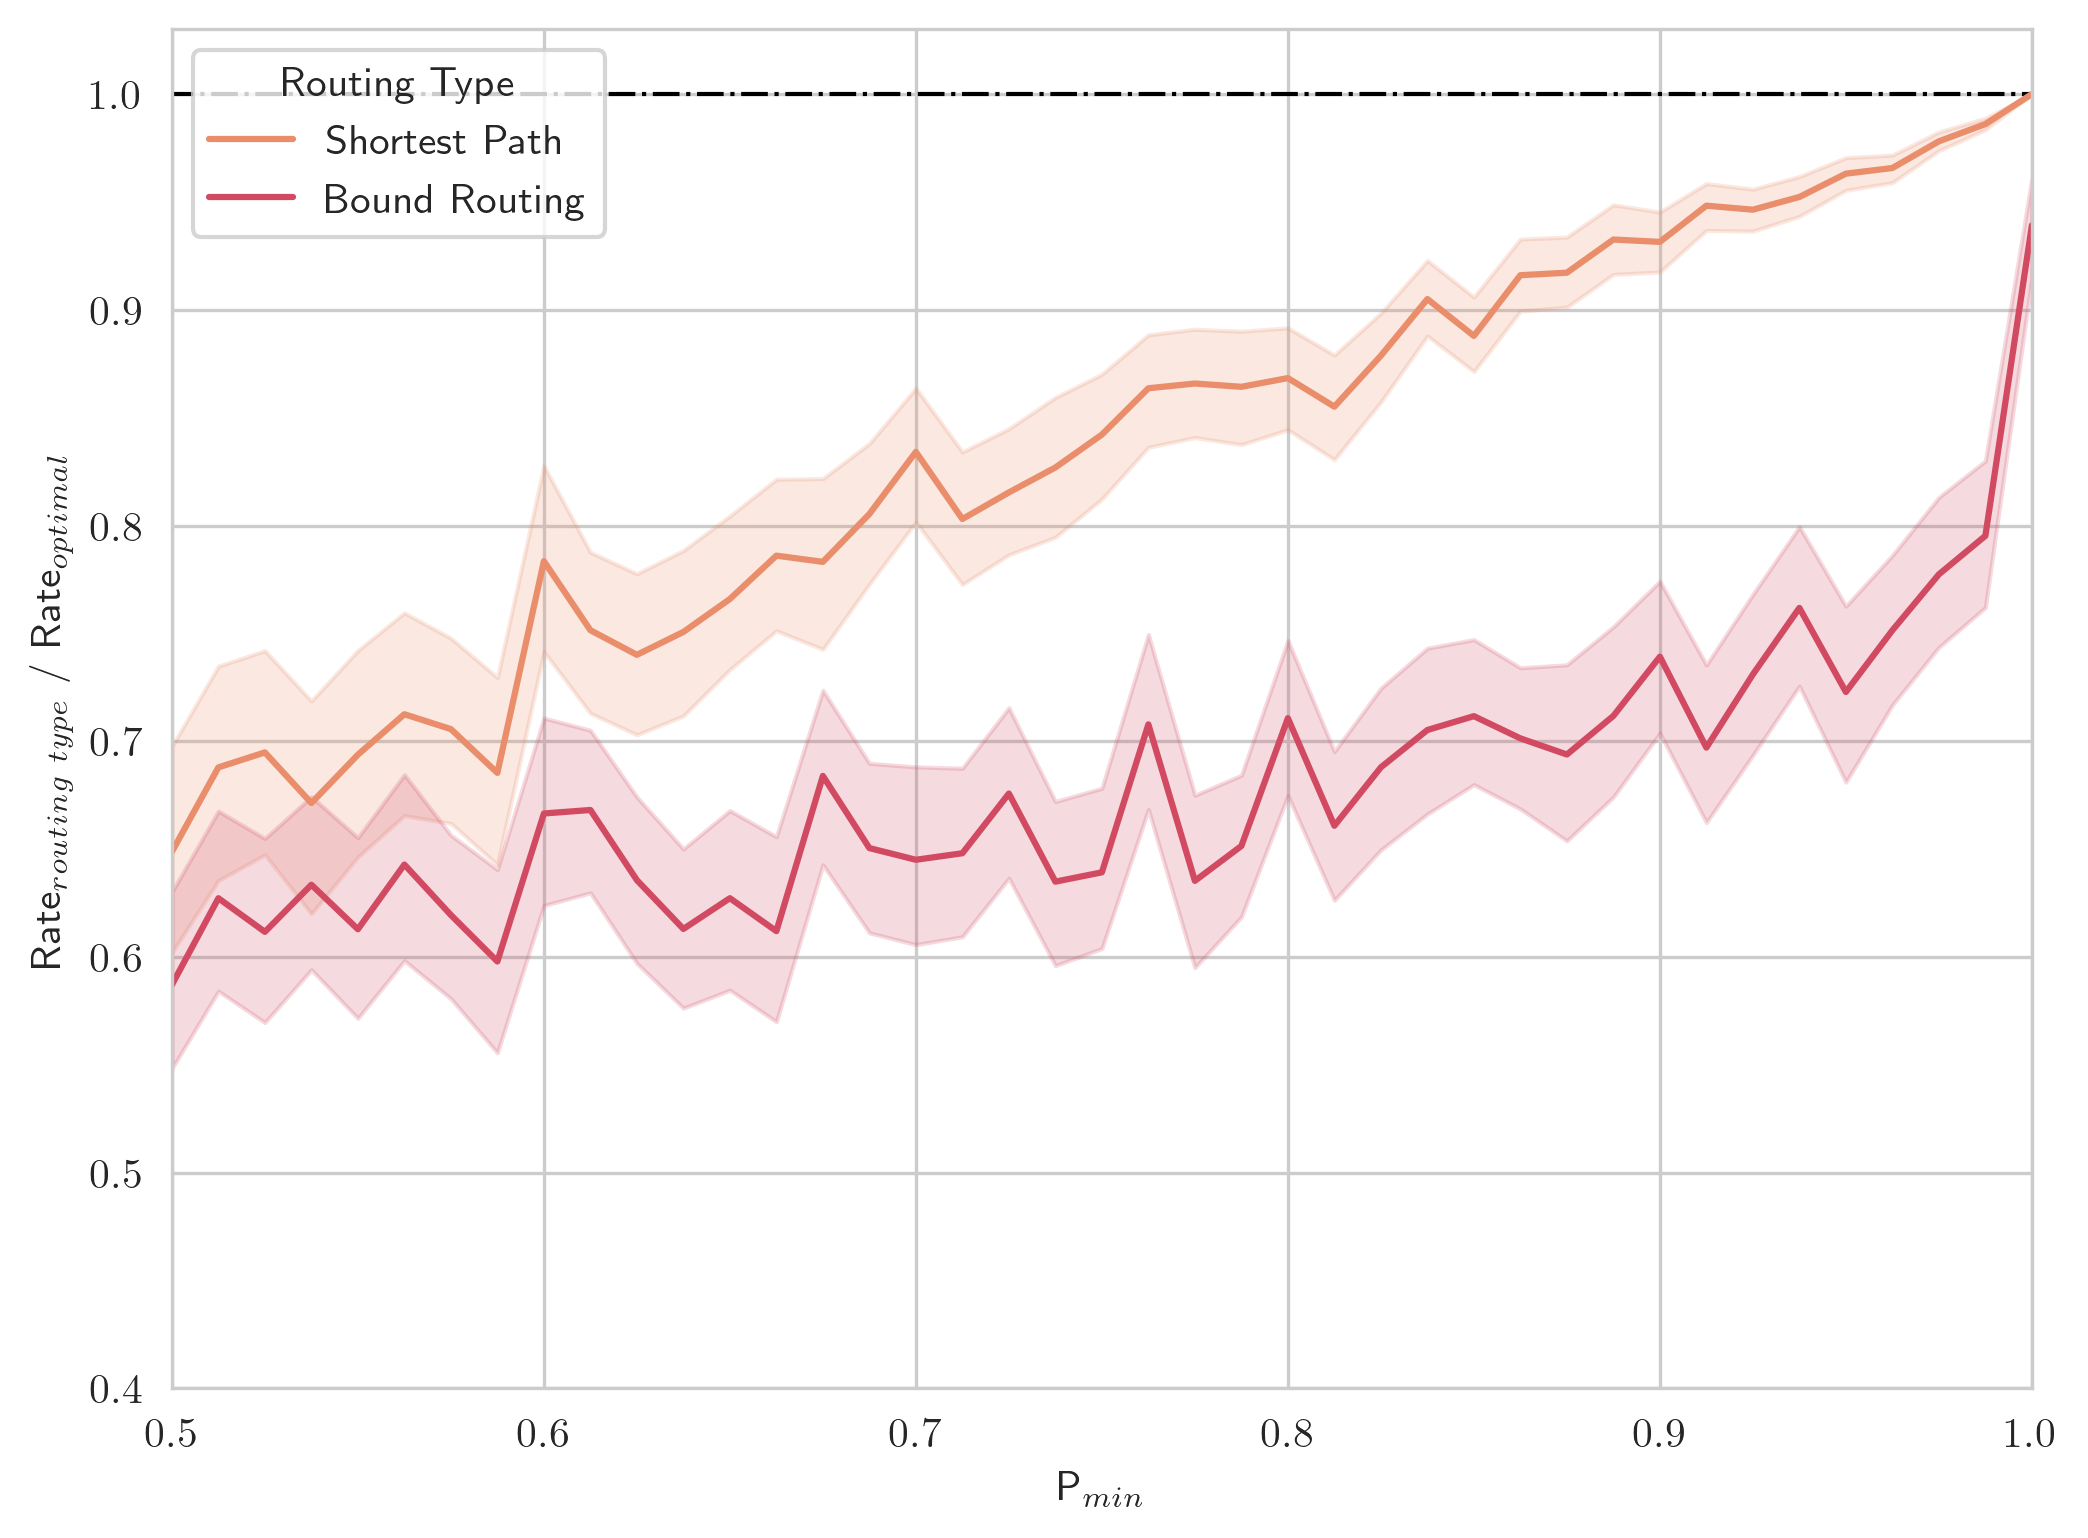

In [19]:
# Load package
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':300})

# Creating dataset
df = pd.DataFrame.from_dict(data_conv)
df1 = df[~(df['n_links'] > 1000)]
df2 = df1[df1["valid_bound"]]

df1.insert(0, "Routing Type", ["Shortest Path"]*len(df1), True)
df1 = df1.rename(columns={'fid_shortest': 'fid', 'rate_shortest': 'rate'})
df1 = df1.drop(columns=['fid_bound', 'rate_bound'])
df1s = df1.copy()
df1s["n_links"] = df1s["n_links"]-1
df1s = df1s[~(df1s['n_links'] > 8)]

df2.insert(0, "Routing Type", ["Bound Routing"]*len(df2), True)
df2 = df2.rename(columns={'fid_bound': 'fid', 'rate_bound': 'rate'})
df2 = df2.drop(columns=['fid_shortest', 'rate_shortest'])
df2s = df2.copy()
df2s["n_links"] = df2s["n_links"]-2
#df2s = df2s[~(df2s['n_links'] > 7)]



df12 = pd.concat([df1, df2])
#print(df1)
#print(df2)
#print(df12)
df12s = pd.concat([df1s, df2s])
print(df12s)
#print(df12s[df12s['p'] == 1].to_dict())

colors = [sns.color_palette("flare")[0]] + [sns.color_palette("flare")[2]]
fig, ax = plt.subplots(figsize=(8, 6))
sns.set_style('whitegrid')
ax = sns.lineplot(x='p', y='rate',hue="Routing Type",data=df12s,legend=True,palette=colors)
#ax = sns.stripplot(x='p', y='rate',hue="Routing Type",data=df12,dodge=True, alpha=.05,linewidth=0.5,marker ="D", size=3, legend=False,palette=colors)
#ax = sns.boxplot(x='p',y='rate',hue="Routing Type",data=df12,linewidth=0.5,showfliers=False,width=0.5,boxprops={"zorder": 2},palette=colors)
ax.hlines(y=1.00, xmin=0, xmax=1, linewidth=1, linestyle='-.',color="black",alpha=1.0)


ax.set_ylim(0.4, 1.03)
ax.set_xlim(0.5, 1)
plt.xlabel("P$_{min}$")
ax.xaxis.grid(True)
ax.set(ylabel='Rate$_{routing \ type}$ / Rate$_{optimal}$')
#sns.despine(trim=True, left=True)
plt.savefig("Plots/conv_rate.pdf")
plt.show()